<a href="https://colab.research.google.com/github/luisdiaz1997/BadNetwork/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

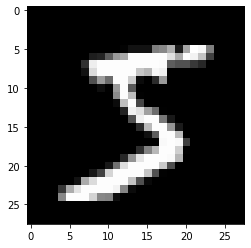

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [0]:
input_shape = (28, 28, 1)

In [0]:
LATENT_SIZE = 2
encoder = Sequential([
    Conv2D(256, kernel_size=(5, 5), strides = (1,1), input_shape= input_shape, activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides = (2, 2)),
    Dropout(0.2),
    Conv2D(128, kernel_size=(2, 2), strides = (1,1), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides = (2, 2)),
    Dropout(0.1),
    Conv2D(64, kernel_size=(3, 3), strides = (1,1), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides = (1, 1)),
    Conv2D(32, kernel_size=(2, 2), strides = (1,1), activation = 'tanh'),
    Flatten(),
    Dense(LATENT_SIZE, activation="tanh"),
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,), activation = 'tanh'),
    Dropout(0.2),
    Dense(128),
    LR(),
    Dropout(0.2),
    Dense(256),
    LR(),
    Dropout(0.2),
    Dense(512),
    LR(),
    Dropout(0.2),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28, 1))
])

In [0]:
classifier = Sequential([
    Dense(32, input_shape = (LATENT_SIZE,), activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'tanh'),
    Dense(10, activation = 'sigmoid'),
])

In [0]:
img = Input(shape = ( 28, 28, 1))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")



In [0]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 256)       6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          7

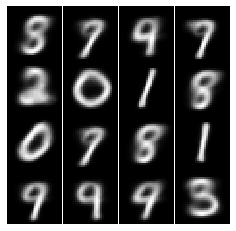

----------- EPOCH 9 -----------
Train on 60000 samples
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1919


In [0]:
EPOCHS = 10
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28, 1))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0].reshape(28, 28), cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)

In [0]:
output2 = classifier(latent_vector)
model2 = Model(inputs = img, outputs = output2)
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 2)                 219938    
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                4618      
Total params: 224,556
Trainable params: 224,556
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.6164 - acc: 0.7749
Epoch 2/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2894 - acc: 0.8773
Epoch 3/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1797 - acc: 0.9609
Epoch 4/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1269 - acc: 0.9712
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1239 - acc: 0.9730
Epoch 6/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1073 - acc: 0.9754
Epoch 7/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1035 - acc: 0.9768
Epoch 8/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1028 - acc: 0.9768
Epoch 9/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0979 - acc: 0.9776
Epoch 10/10
60000/60000 [=======================

In [0]:
predict = model.predict(x_test)

Actual number 0


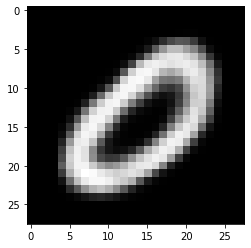

In [0]:
i = 10
plt.imshow(predict[i][:,:,0], cmap = 'gray')
print('Actual number', y_test[i])

In [0]:
encoded_data = encoder.predict(x_train)

In [0]:
x_norm = (encoded_data-np.mean(encoded_data, axis = 0, keepdims = True))/np.var(encoded_data, axis = 0, keepdims = True)

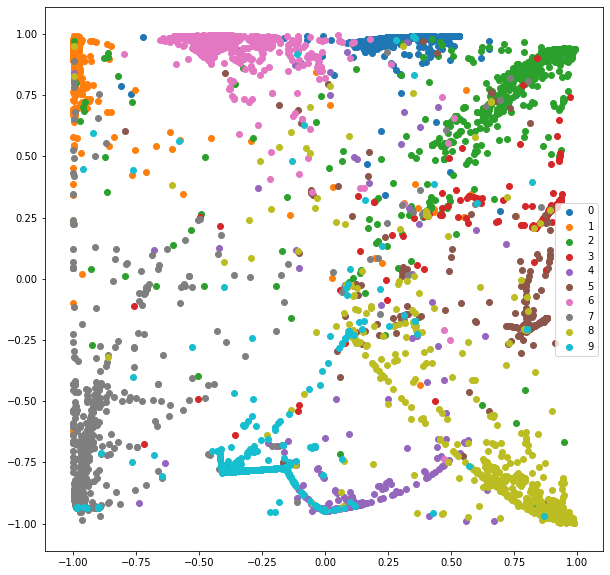

In [0]:
plt.figure(figsize= (10, 10))
N =5000
for i in range(10):
  mask = y_train == i
  plt.scatter(encoded_data[mask][:N, 0], encoded_data[mask][:N, 1], label = i)
plt.legend()

In [0]:
C = np.dot(x_norm.T, x_norm)

In [0]:
[U, S, V] = np.linalg.svd(C)

In [0]:
x_norm

array([[ 1.457638  , -0.00807349],
       [ 0.4926359 ,  1.3452721 ],
       [ 0.06970203, -1.3953786 ],
       ...,
       [ 1.3093344 , -0.3662143 ],
       [-1.2166365 ,  1.3471093 ],
       [ 1.6190075 , -1.4897993 ]], dtype=float32)

In [0]:
K = 2
Z = np.dot(x_norm, U[:, :K])

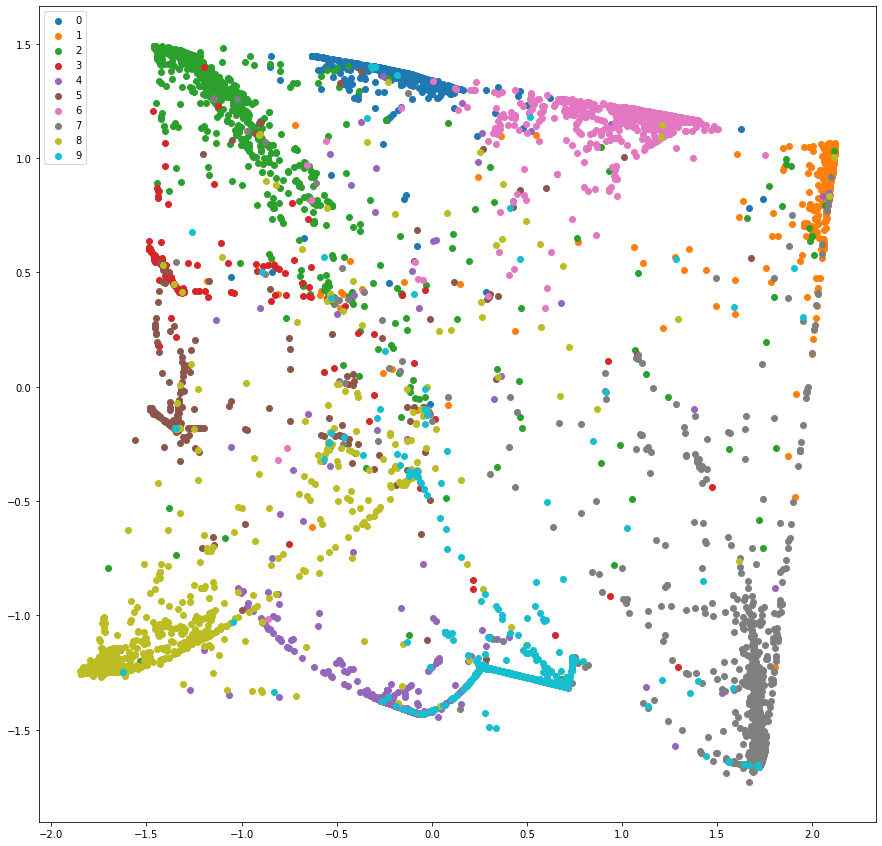

In [0]:
plt.figure(figsize= (15, 15))
N =10000
for i in range(10):
  mask = y_train == i
  plt.scatter(Z[mask][:N, 0], Z[mask][:N, 1], label = i)
plt.legend();

In [0]:
np.round(S/sum(S), 3)

array([0.562, 0.438], dtype=float32)

In [0]:
model2.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 73us/sample - loss: 0.0804 - acc: 0.9839


[0.08042313086614013, 0.9839]